In [24]:
#first importing libraries and packages
!pip install scikit-learn
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [28]:
#importing the data 
data = pd.read_csv(r'/Users/karlyn/Downloads/breast+cancer/breast-cancer.csv')
#printing the columns to see which column to use 
print(data.columns)
X = data.drop(columns=["no-recurrence-events"])

label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':  # Check for categorical columns
        X[col] = label_encoder.fit_transform(X[col])
#standarized the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#now able to perform k clustering 
sse = []  # Sum of Squared Errors for each value of k
k_range = range(1, 11)  # Trying the values of k from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

Index(['no-recurrence-events', '30-39', 'premeno', '30-34', '0-2', 'no', '3',
       'left', 'left_low', 'no.1'],
      dtype='object')


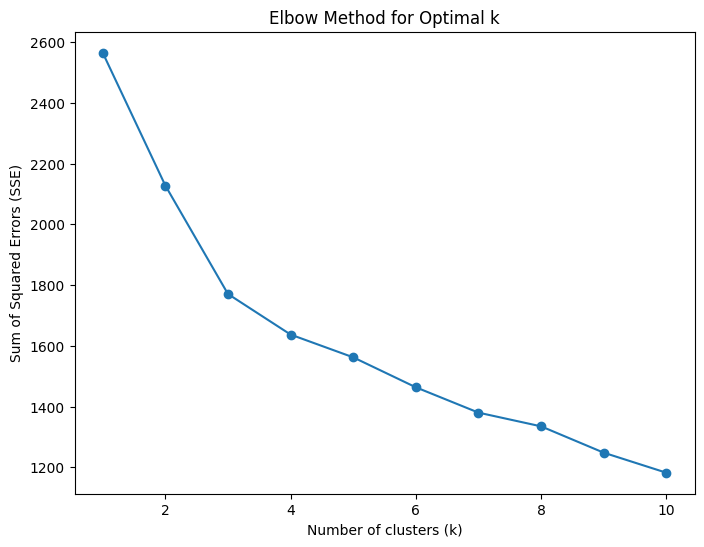

In [29]:
#plotting the graph 
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()

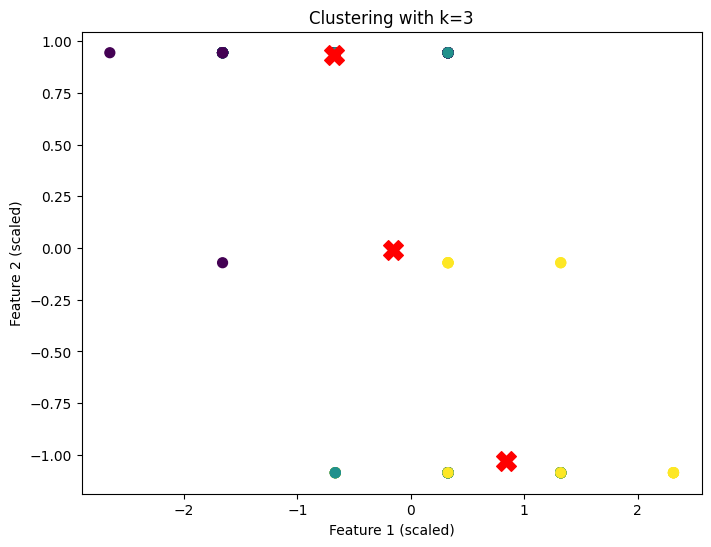

In [32]:
optimal_k = 3  #where that elbow is 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
# Plot the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title(f"Clustering with k={optimal_k}")
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()